# Projet 5 - Segmenter des clients d'un site e-commerce
# Partie 3 : Contrat de maintenance

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Technical-environment-setup" data-toc-modified-id="Technical-environment-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Technical environment setup</a></span></li><li><span><a href="#Maintenance-of-the-clustering-model" data-toc-modified-id="Maintenance-of-the-clustering-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maintenance of the clustering model</a></span><ul class="toc-item"><li><span><a href="#Dataset-splitting" data-toc-modified-id="Dataset-splitting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset splitting</a></span><ul class="toc-item"><li><span><a href="#Initialization-of-some-useful-variables" data-toc-modified-id="Initialization-of-some-useful-variables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Initialization of some useful variables</a></span></li><li><span><a href="#Time-splitter-function" data-toc-modified-id="Time-splitter-function-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Time-splitter function</a></span></li><li><span><a href="#Time-period-incremental--function" data-toc-modified-id="Time-period-incremental--function-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Time-period incremental  function</a></span></li></ul></li><li><span><a href="#Maintenance-model" data-toc-modified-id="Maintenance-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Maintenance model</a></span><ul class="toc-item"><li><span><a href="#Modules-importation" data-toc-modified-id="Modules-importation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Modules importation</a></span></li><li><span><a href="#Initialization-at-t=t0" data-toc-modified-id="Initialization-at-t=t0-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Initialization at t=t0</a></span></li><li><span><a href="#Test-:-comparison-after-15-days" data-toc-modified-id="Test-:-comparison-after-15-days-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Test : comparison after 15 days</a></span></li><li><span><a href="#Iteration-on-the-global-dataset" data-toc-modified-id="Iteration-on-the-global-dataset-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Iteration on the global dataset</a></span></li><li><span><a href="#Model-accuracy-over-time-:-when-is-it-necessary-to-refresh-the-clustering?" data-toc-modified-id="Model-accuracy-over-time-:-when-is-it-necessary-to-refresh-the-clustering?-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Model accuracy over time : when is it necessary to refresh the clustering?</a></span></li><li><span><a href="#Confirmation-of-the-update-frequency" data-toc-modified-id="Confirmation-of-the-update-frequency-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Confirmation of the update frequency</a></span></li><li><span><a href="#Initialization-at-t=t0_bis" data-toc-modified-id="Initialization-at-t=t0_bis-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Initialization at t=t0_bis</a></span><ul class="toc-item"><li><span><a href="#Iteration-on-the-global-dataset" data-toc-modified-id="Iteration-on-the-global-dataset-2.2.7.1"><span class="toc-item-num">2.2.7.1&nbsp;&nbsp;</span>Iteration on the global dataset</a></span></li><li><span><a href="#Evolution-of-ARI-score-during-the-last-4-months-of-the-dataset" data-toc-modified-id="Evolution-of-ARI-score-during-the-last-4-months-of-the-dataset-2.2.7.2"><span class="toc-item-num">2.2.7.2&nbsp;&nbsp;</span>Evolution of ARI score during the last 4 months of the dataset</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Conclusion-" data-toc-modified-id="Conclusion--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion <br></a></span></li></ul></div>

## Technical environment setup

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
# checking PEP8 compliance

In [2]:
%pylab inline 
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
%config IPCompleter.greedy=True #Auto-complétion
pd.options.display.max_colwidth = 90
pd.set_option('display.max_columns', None) # pour afficher toutes les colonnes
pd.set_option('display.max_rows', None)  # Pour afficher toutes les lignes

## Maintenance of the clustering model

### Dataset splitting

In [4]:
df = pd.read_csv('Segmentation_olist', index_col=0, parse_dates=True)

In [5]:
df.head()

,total_number_of_orders,days_since_order,total_payment_sum,review_score,label,order_date
customer_unique_id,,,,,,
861eff4711a542e4b93843c6dd7febb0,1,1932,146.87,4,1,2017-05-16
9eae34bbd3a474ec5d07949ca7de67c0,1,1755,275.79,1,2,2017-11-09
9eae34bbd3a474ec5d07949ca7de67c0,1,1755,275.79,1,2,2017-11-09
3c799d181c34d51f6d44bbbc563024db,1,1941,140.61,3,1,2017-05-07
23397e992b09769faf5e66f9e171a241,1,1669,137.58,4,4,2018-02-03


In [6]:
from datetime import datetime as dt

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d') # Conversion to datetime format
df['order_date'] = df['order_date'].dt.date   # ('%Y-%m-%d')

#### Initialization of some useful variables

In [8]:
start = df['order_date'].min()
start

datetime.date(2016, 10, 3)

In [9]:
end = df['order_date'].max()
end

datetime.date(2018, 8, 29)

In [11]:
duration = df['order_date'].max() - df['order_date'].min()

In [12]:
duration

datetime.timedelta(days=695)

In [13]:
t0 = duration/2

In [14]:
t0

datetime.timedelta(days=347, seconds=43200)

In [15]:
df['days_since_start'] = (df['order_date'] - start).dt.days

#### Time-splitter function

In [21]:
# Function to cut the dataframe in two parts:
def DataFrame_time_split(df, end_time):
    start = df['order_date'].min()
    end = df['order_date'].max()
    duration = end - start
    df_a = df[(df['order_date'] >= start) &
              ((df['order_date'] - start < end_time))]
    return df_a

In [22]:
df_a = DataFrame_time_split(df, duration/2)

In [23]:
df_a.head()

,total_number_of_orders,days_since_order,total_payment_sum,review_score,label,order_date,days_since_start
customer_unique_id,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1,1932,146.87,4,1,2017-05-16,225
3c799d181c34d51f6d44bbbc563024db,1,1941,140.61,3,1,2017-05-07,216
567ab47ca4deb92d46dbf54dce07d0a7,1,1986,142.05,4,1,2017-03-23,171
f40ab89b622248b7ca125af4b486b887,1,1932,155.70,4,1,2017-05-16,225
749943913a9851a39c9baf51877fbab6,1,1991,148.33,2,2,2017-03-18,166


In [24]:
df_a['order_date'].max()

datetime.date(2017, 9, 15)

#### Time-period incremental  function

In [26]:
# Function to generate an incremented dataset with a specified time period

def DataFrame_order_increment(df, start=df['order_date'].min(), time_period):
    df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
    df['order_date'] = df['order_date'].dt.date   # ('%Y-%m-%d')
    start = df['order_date'].min() 
    end = df['order_date'].max()
    duration = end - start
    df_t0 = df[(df['order_date'] >= start) &
               ((df['order_date'] - start < (duration/2)))]
    df_2 = df[(df['days_since_start'] <=
               (df_t0['days_since_start'].max() + time_period))]
    result = pd.concat([df_t0, df_2], axis=0, join='outer')
    return result

### Maintenance model

#### Modules importation

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

#### Initialization at t=t0

In [31]:
data_t0 = DataFrame_order_increment(df, df['order_date'].min(), 0)
data_t0 = data_t0.drop('order_date', axis=1)

In [33]:
F0 = StandardScaler().fit_transform(data_t0)
M0 = KMeans(n_clusters=5, random_state=7)
C0 = M0.fit(F0)

#### Test : comparison after 15 days

In [34]:
# Test with one df
data_t1 = DataFrame_order_increment(df, df['order_date'].min(), 15)
data_t1 = data_t1.drop('order_date', axis=1)
F1 = StandardScaler().fit_transform(data_t1)

M1 = KMeans(n_clusters=5, random_state=7)
C1_init = M0.predict(F1)
C1_new = M1.fit(F1)
C1_new_labels = M1.labels_

adjusted_rand_score(C1_new_labels, C1_init)

0.998705310520213

After 15 days, the model is still very accurate since the ARI score is over 0.998. 
For the following project, the __model will be considered as accurate over time if the ARI score is higher than 0.8__. <br>
Now, the same operation will be performed for the entire dataset, by incremental time periods of 7 days (also known as weeks). In the end, a graphical representation of ARI score over time will be proposed to determine the more appropriate maintenance delay.

#### Iteration on the global dataset

In [35]:
# For-loop to iterate
time_in_days = []
ARI_score = []
for i in range(1, 50):
    x = 7*i
    data_ti = DataFrame_order_increment(df, df['order_date'].min(), x)
    data_ti = data_ti.drop('order_date', axis=1)
    Fi = StandardScaler().fit_transform(data_ti)
    Mi = KMeans(n_clusters=5, random_state=7)
    Ci_init = M0.predict(Fi)
    Ci_new = Mi.fit(Fi)
    Ci_new_labels = Mi.labels_
    ARI_i = adjusted_rand_score(Ci_new_labels, Ci_init)
    time_in_days.append((x))
    ARI_score.append(ARI_i)

#### Model accuracy over time : when is it necessary to refresh the clustering?

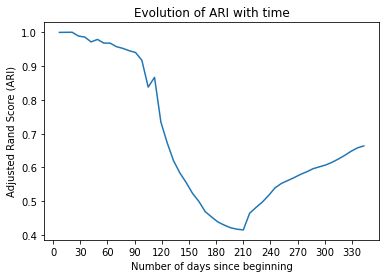

In [36]:
plt.figure()
plt.plot(time_in_days, ARI_score)
plt.xlabel('Number of days since beginning')
plt.xticks(np.arange(0, 350, step=30))
plt.ylabel('Adjusted Rand Score (ARI)')
plt.title('Evolution of ARI with time')
plt.show()

In [37]:
ari = pd.DataFrame(data=ARI_score, columns=['ARI_score'])
ari['number_of_days'] = time_in_days

In [39]:
ari[ari['ARI_score'] <= 0.8]  # After 119 days, the clustering model is not accurate enough and needs an update

,ARI_score,number_of_days
16,0.734440,119
17,0.672749,126
18,0.619855,133
19,0.583739,140
20,0.555187,147
21,0.523188,154
22,0.499446,161
23,0.469277,168
24,0.453553,175
25,0.438701,182


ARI scores is under 0.8 after 119 days, which is approximately 4 months. Another simulation will be done to check that this delay is correct

#### Confirmation of the update frequency
In this part of the project, the last 4 months will be studied to check that the ARI score is still accurate on the most recent data. The exact same code will be used, with an adjustment on the dates to fit the time-period concerned.

#### Initialization at t=t0_bis

In [41]:
# Total duration over the global file : 695 days, halftime : 347
# From half of it, if we want to start 4 months (120 days) before the end,
# we need to add 228 days to the halftime to reach (695-120)
data_t0_bis = DataFrame_order_increment(df, df['order_date'].min(), 228)
data_t0_bis = data_t0_bis.drop('order_date', axis=1)

In [49]:
df['days_since_start'].max() - data_t0_bis['days_since_start'].max()
# 120 days == 18 weeks

120

In [43]:
F0 = StandardScaler().fit_transform(data_t0_bis)
M0 = KMeans(n_clusters=5, random_state=7)
C0 = M0.fit(F0)

##### Iteration on the global dataset

In [44]:
time_in_days_bis = []
ARI_score_bis = []
for i in range(1, 18):  # 22 weeks to the end
    x = 7*i
    data_ti = DataFrame_order_increment(df, df['order_date'].min(), 228+x)
    data_ti = data_ti.drop('order_date', axis=1)
    Fi = StandardScaler().fit_transform(data_ti)
    Mi = KMeans(n_clusters=5, random_state=7)
    Ci_init = M0.predict(Fi)
    Ci_new = Mi.fit(Fi)
    Ci_new_labels = Mi.labels_
    ARI_i = adjusted_rand_score(Ci_new_labels, Ci_init)
    time_in_days_bis.append((x))
    ARI_score_bis.append(ARI_i)

##### Evolution of ARI score during the last 4 months of the dataset

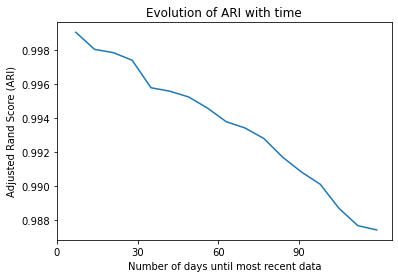

In [52]:
plt.figure()
plt.plot(time_in_days_bis, ARI_score_bis)
plt.xlabel('Number of days until most recent data')
# For a view in 30-days time period (by month):
plt.xticks(np.arange(0, 120, step=30))
plt.ylabel('Adjusted Rand Score (ARI)')
plt.title('Evolution of ARI with time')
plt.show()

In [46]:
ari_bis = pd.DataFrame(data=ARI_score_bis, columns=['ARI_score'])
ari_bis['number_of_days'] = time_in_days_bis

In [47]:
ari_bis.head()

,ARI_score,number_of_days
0,0.999031,7
1,0.998026,14
2,0.997832,21
3,0.997387,28
4,0.995772,35


In [48]:
ari_bis[ari_bis['ARI_score'] <= 0.8] # The model is constantly accurate in the last 4 months!

,ARI_score,number_of_days


## Conclusion <br>
- The maintenance model is accurate and suggest to update the clustering every 4 months approximately.
- During the time-period where the model is accurate, the ARI score is constantly over 0.8, suggesting that the clustering model is reliable.
- The model update can be fully automatized and only requires the input of the new datasets in the clustering notebook.